In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

See [here for inflation factor](https://www.census.gov/programs-surveys/acs/guidance/comparing-acs-data/2016.html) to compare ACS 2016 to Census 2000 income

In [2]:
fields = []

# Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,12)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('A.AF9FE0{}'.format(n))

# Household Income by Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,12)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('A.AF9IE0{}'.format(n))
    
# Gross Rent as a Percentage of Household Income in 1999
num_range = [str(n) for n in range(1,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('D.GBW0{}'.format(n))

# Household Income by Gross Rent as a Percentage of Household Income in the Past 12 Months
num_range = [str(n) for n in range(1,43)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    fields.append('D.GB30{}'.format(n))

    
print fields

['A.AF9FE001', 'A.AF9FE002', 'A.AF9FE003', 'A.AF9FE004', 'A.AF9FE005', 'A.AF9FE006', 'A.AF9FE007', 'A.AF9FE008', 'A.AF9FE009', 'A.AF9FE010', 'A.AF9FE011', 'A.AF9IE001', 'A.AF9IE002', 'A.AF9IE003', 'A.AF9IE004', 'A.AF9IE005', 'A.AF9IE006', 'A.AF9IE007', 'A.AF9IE008', 'A.AF9IE009', 'A.AF9IE010', 'A.AF9IE011', 'D.GBW001', 'D.GBW002', 'D.GBW003', 'D.GBW004', 'D.GBW005', 'D.GBW006', 'D.GBW007', 'D.GBW008', 'D.GBW009', 'D.GBW010', 'D.GB3001', 'D.GB3002', 'D.GB3003', 'D.GB3004', 'D.GB3005', 'D.GB3006', 'D.GB3007', 'D.GB3008', 'D.GB3009', 'D.GB3010', 'D.GB3011', 'D.GB3012', 'D.GB3013', 'D.GB3014', 'D.GB3015', 'D.GB3016', 'D.GB3017', 'D.GB3018', 'D.GB3019', 'D.GB3020', 'D.GB3021', 'D.GB3022', 'D.GB3023', 'D.GB3024', 'D.GB3025', 'D.GB3026', 'D.GB3027', 'D.GB3028', 'D.GB3029', 'D.GB3030', 'D.GB3031', 'D.GB3032', 'D.GB3033', 'D.GB3034', 'D.GB3035', 'D.GB3036', 'D.GB3037', 'D.GB3038', 'D.GB3039', 'D.GB3040', 'D.GB3041', 'D.GB3042']


In [3]:
db = "/home/eric/Documents/franklin/cost_burden/generated_data/cost_burden.sqlite"
con = sql.connect(db)
con.text_factory=str


qry = '''
SELECT A.GISJOIN , A.PLACE,
A.AF2LE001 AS pop16,
C.FL5001 AS pop00,
B.AGQ1E003 AS med_renter_inc_16,
A.AF89E001 AS med_gross_rent_16,
D.GED002 * 1.4415372 AS med_renter_inc_00,
D.GBO001 * 1.4415372 AS med_gross_rent_00,
{}
FROM nhgis_20165_place_ds225 AS A JOIN nhgis_20165_place_ds226 AS B
    ON A.GISJOIN = B.GISJOIN 
JOIN nhgis_2000_place_ds146 AS C 
    ON A.GISJOIN = C.GISJOIN
JOIN nhgis_2000_place_ds151 AS D
    ON A.GISJOIN = D.GISJOIN
WHERE A.STATEA NOT IN ('72', '02', '15')
AND B.AGQ1M003 <> '' AND A.AF89E001 <> ''
AND C.FL5001 > 10000
'''.format(', '.join(map(str, fields)))

df = pd.read_sql(qry, con, index_col='GISJOIN')
con.close()

print len(df)
df.head()

3340


,PLACE,pop16,pop00,med_renter_inc_16,med_gross_rent_16,med_renter_inc_00,med_gross_rent_00,AF9FE001,AF9FE002,AF9FE003,...,GB3033,GB3034,GB3035,GB3036,GB3037,GB3038,GB3039,GB3040,GB3041,GB3042
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G01000820,Alabaster city,32269,22619,52500,947,45948.998250,863.480783,1844,35,184,...,0,0,0,0,42,0,0,0,0,0
G01000988,Albertville city,21434,17247,22565,601,23941.049818,601.121012,2845,99,284,...,0,0,0,0,34,0,0,0,0,0
G01001132,Alexander City city,14859,15008,18811,545,23981.412859,497.330334,2594,158,118,...,0,0,0,23,24,0,0,0,0,0
G01001852,Anniston city,22441,24276,17485,596,22686.912454,566.524120,4006,136,392,...,0,0,0,7,80,0,0,0,0,0
G01002956,Athens city,24461,18967,20707,614,27952.847845,549.225673,3333,129,346,...,0,0,0,9,55,0,0,0,0,9


In [4]:
# gen cost burden vars
df['renter_cost_burden_16'] = 0
num = 0
denom = 0
num_range = [str(n) for n in range(7,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    num += df['AF9FE0{}'.format(n)]  
    
df['renter_cost_burden_16'] = num * 1.0 / df['AF9FE001'] * 100


# 2000
df['renter_cost_burden_00'] = 0
num = 0
denom = 0
num_range = [str(n) for n in range(6,10)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    num += df['GBW0{}'.format(n)]  
    
num_range = [str(n) for n in range(1,11)]
for n in num_range:
    if len(n) == 1:
        n = '0'+n
    denom += df['GBW0{}'.format(n)]  
    
df['renter_cost_burden_00'] = num * 1.0 / denom * 100

In [5]:
# calc pop change in each decade
df['ppctchg_0016'] = ( df['pop16'] - df['pop00'] ) * 1.0 / df['pop00'] * 100

# growth categories 2000-2010
df['growth_cat'] = 0
df.loc[df['ppctchg_0016'] >= 5, 'growth_cat'] = 'growing'
df.loc[(df['ppctchg_0016'] < 5) & (df['ppctchg_0016'] >= 0 ), 'growth_cat'] = 'stable'
df.loc[df['ppctchg_0016'] < 0, 'growth_cat'] = 'shrinking'

df.groupby('growth_cat').size()

growth_cat
growing      1878
shrinking     820
stable        642
dtype: int64

In [6]:
# create index values where 100 = 2000 val
cols = ['med_renter_inc', 'med_gross_rent']
for c in cols:
    df['{}_00_idx'.format(c)] = df['{}_00'.format(c)] / df['{}_00'.format(c)] * 100

for c in cols:
    df['{}_16_idx'.format(c)] = df['{}_16'.format(c)] / df['{}_00'.format(c)] * 100

(0, 45118.379135520001)

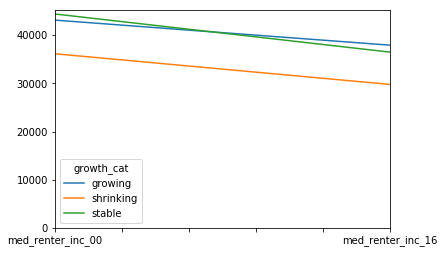

In [7]:
grouped = df.groupby('growth_cat')
cols = ['med_renter_inc_00', 'med_renter_inc_16']
ax=grouped[cols].median().transpose().plot()
ax.set_ylim(0)

(0, 999.52849560000004)

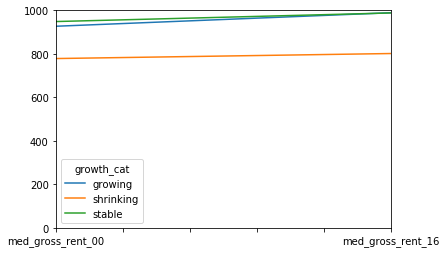

In [8]:
grouped = df.groupby('growth_cat')
cols = ['med_gross_rent_00', 'med_gross_rent_16']
ax=grouped[cols].median().transpose().plot()
ax.set_ylim(0)

(80, 115)

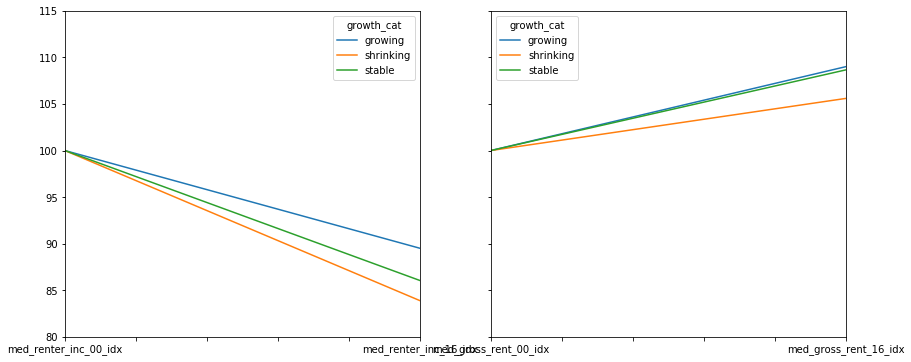

In [9]:
w = 14
h = 6
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

cols = ['med_renter_inc_00_idx', 'med_renter_inc_16_idx']
grouped[cols].median().transpose().plot(ax=ax1)

cols = ['med_gross_rent_00_idx', 'med_gross_rent_16_idx']
ax=grouped[cols].median().transpose().plot(ax=ax2)


ax1.set_ylim(80, 115)

In [10]:
# calc diff for each county
df['renter_inc_diff'] = df['med_renter_inc_16_idx'] - 100
df['gross_rent_diff'] = df['med_gross_rent_16_idx'] - 100

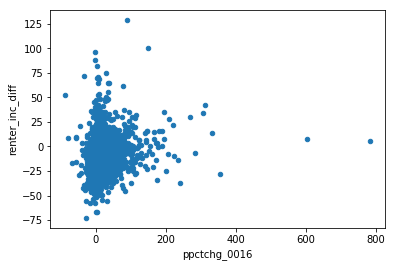

In [11]:
df.plot.scatter('ppctchg_0016', 'renter_inc_diff')

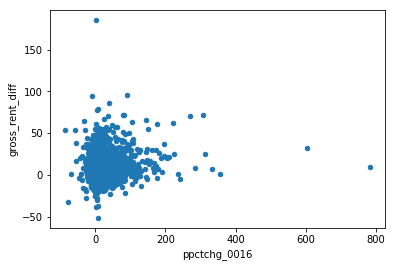

In [12]:
df.plot.scatter('ppctchg_0016', 'gross_rent_diff')

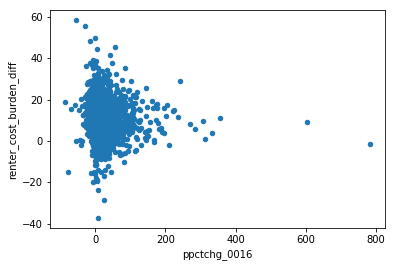

In [13]:
df['renter_cost_burden_diff'] = df['renter_cost_burden_16'] - df['renter_cost_burden_00']
df.plot.scatter('ppctchg_0016', 'renter_cost_burden_diff')

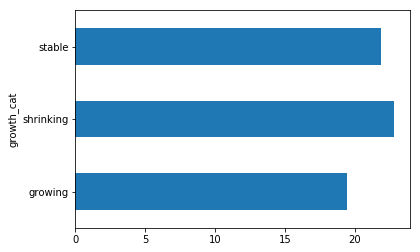

In [14]:
# plot gap between rent increase and income decrease
df['idx_gap'] = df['med_gross_rent_16_idx'] - df['med_renter_inc_16_idx']
df.groupby('growth_cat')['idx_gap'].median().transpose().plot(kind='barh')

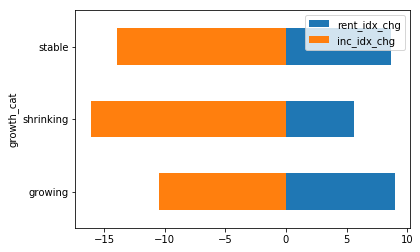

In [15]:
df['rent_idx_chg'] = df['med_gross_rent_16_idx'] - df['med_renter_inc_00_idx']
df['inc_idx_chg'] = df['med_renter_inc_16_idx'] - df['med_renter_inc_00_idx']
cols = ['rent_idx_chg', 'inc_idx_chg']
grouped[cols].median().plot(kind='barh', stacked=True)

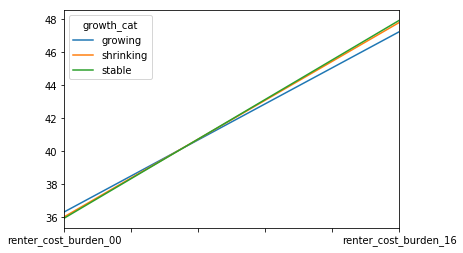

In [16]:
cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
grouped[cols].median().transpose().plot()

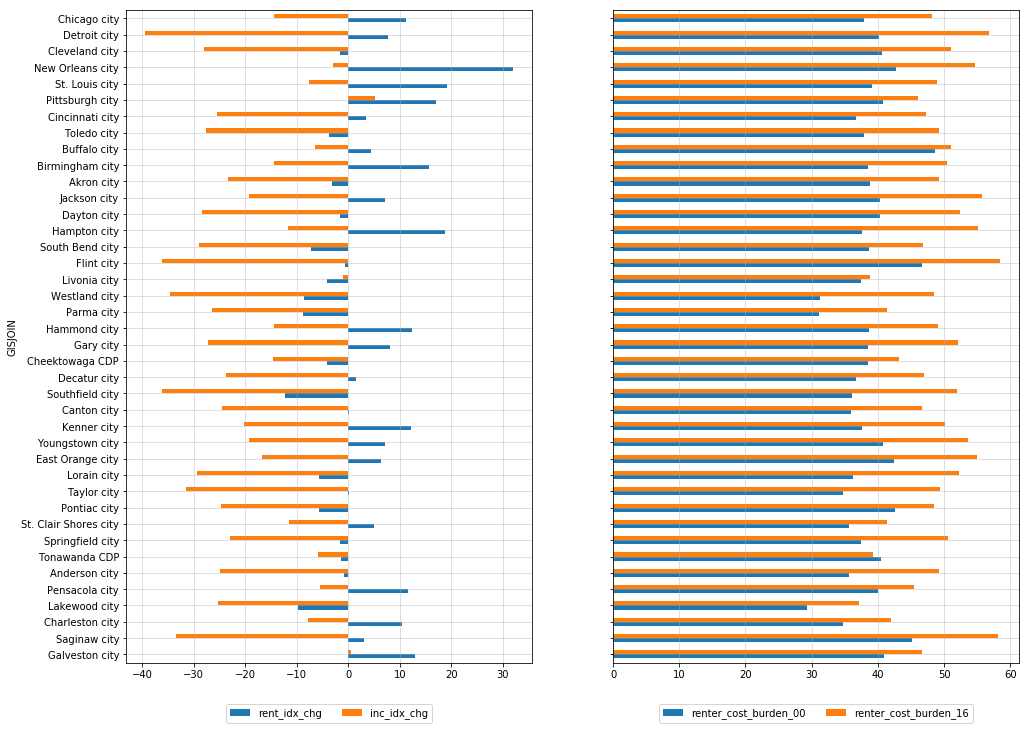

In [17]:
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']<-5)].sort_values('pop16', ascending=False).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['PLACE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['PLACE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

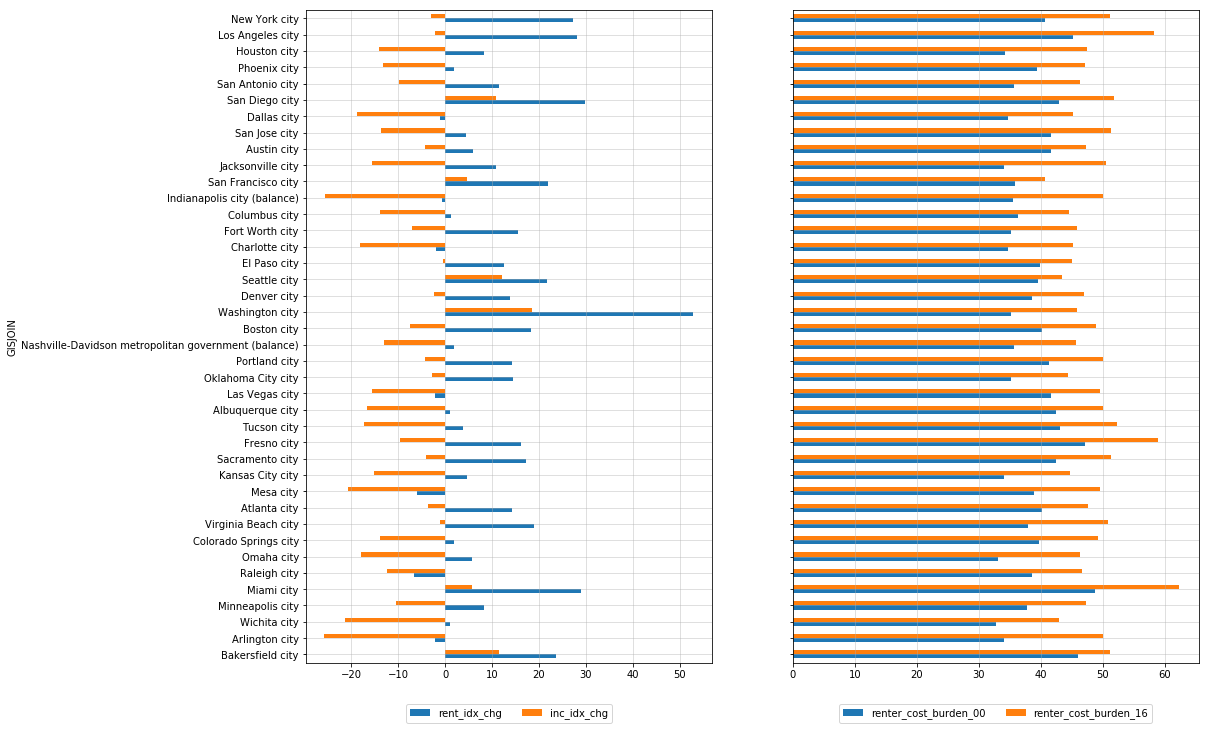

In [18]:
w = 16
h = 12
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

subset = df.loc[(df['ppctchg_0016']>5)].sort_values('pop16', ascending=False).head(40)
subset = subset.iloc[::-1]

cols = ['rent_idx_chg', 'inc_idx_chg']
subset[cols].plot(kind='barh',ax=ax1)
ax1.set_yticklabels(subset['PLACE'])
ax1.grid(zorder=0, alpha=0.5)

cols = ['renter_cost_burden_00', 'renter_cost_burden_16']
# cols = ['idx_gap']
subset[cols].plot(kind='barh',ax=ax2)
ax2.set_yticklabels(subset['PLACE'])
ax2.grid(zorder=0, alpha=0.5)

ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)